In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Loading the dataset

In [23]:
train = pd.read_csv('Titanic-Dataset.csv')
test = pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Exploratory Data Analysis

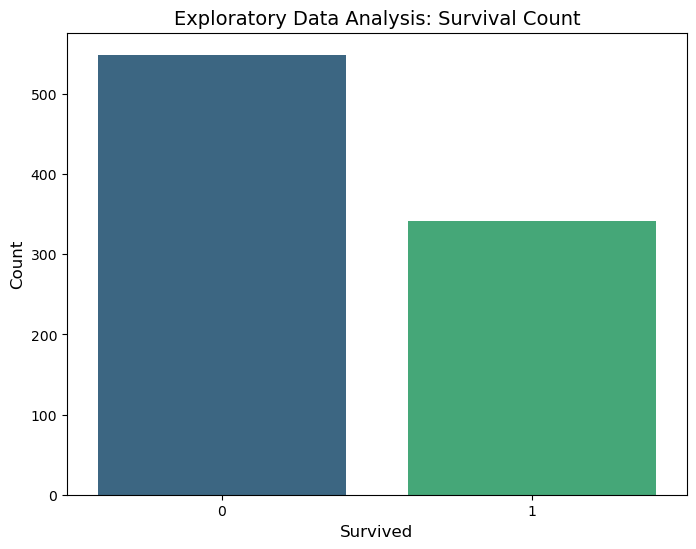

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train, x='Survived', palette='viridis')
plt.xlabel("Survived", fontsize=12)  
plt.ylabel("Count", fontsize=12)
plt.title("Exploratory Data Analysis: Survival Count", fontsize=14)
plt.show()

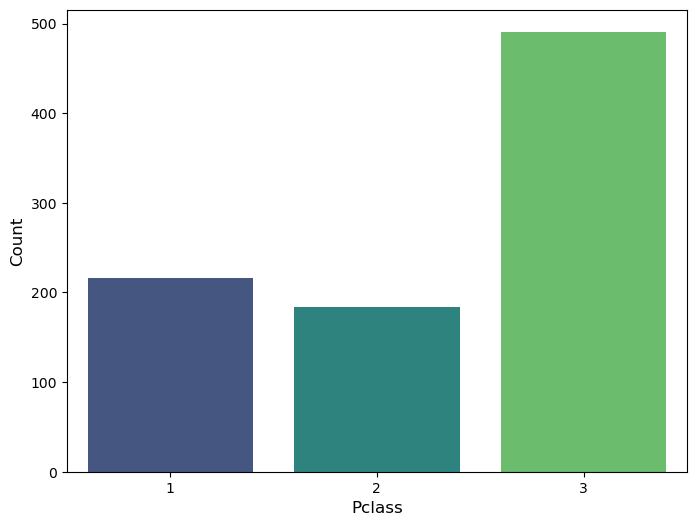

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train, x='Pclass', palette='viridis')
plt.xlabel("Pclass", fontsize=12)  
plt.ylabel("Count", fontsize=12)
plt.show()

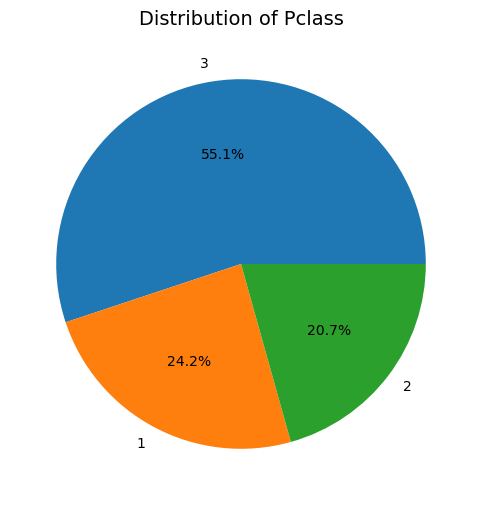

In [28]:
parch_counts = train['Pclass'].value_counts()
plt.figure(figsize=(8, 6))
parch_counts.plot(kind='pie', autopct='%1.1f%%', labels=parch_counts.index)
plt.ylabel('')  
plt.title("Distribution of Pclass", fontsize=14)
plt.show()

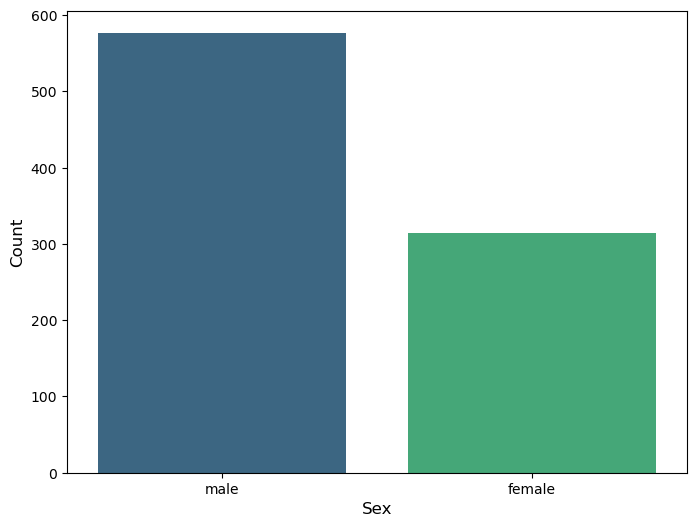

In [29]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train, x='Sex', palette='viridis')
plt.xlabel("Sex", fontsize=12)  
plt.ylabel("Count", fontsize=12)
plt.show()

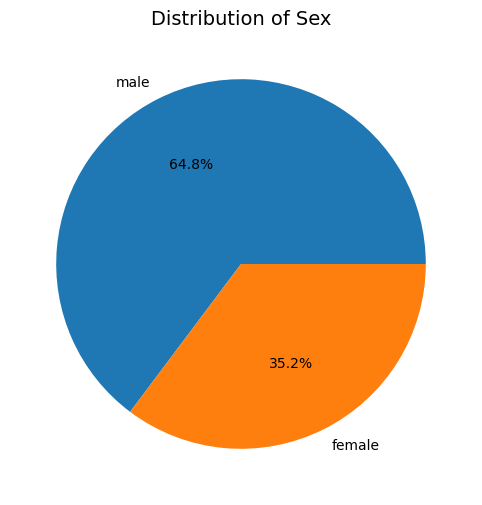

In [30]:
parch_counts = train['Sex'].value_counts()
plt.figure(figsize=(8, 6))
parch_counts.plot(kind='pie', autopct='%1.1f%%', labels=parch_counts.index)
plt.ylabel('')  
plt.title("Distribution of Sex", fontsize=14)
plt.show()

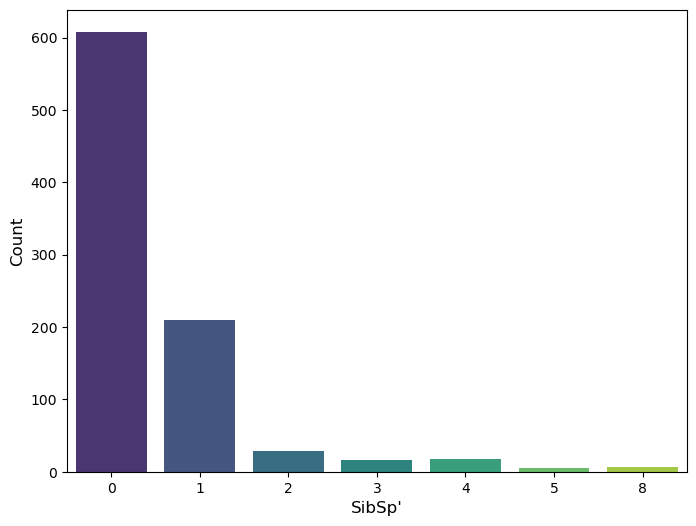

In [31]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train, x='SibSp', palette='viridis')
plt.xlabel("SibSp'", fontsize=12)  
plt.ylabel("Count", fontsize=12)
plt.show()

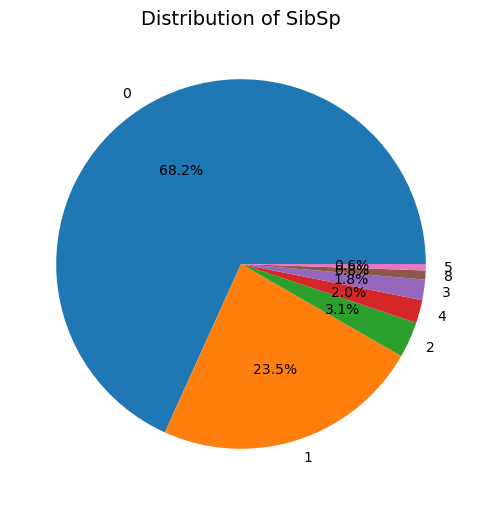

In [32]:
parch_counts = train['SibSp'].value_counts()
plt.figure(figsize=(8, 6))
parch_counts.plot(kind='pie', autopct='%1.1f%%', labels=parch_counts.index)
plt.ylabel('')  
plt.title("Distribution of SibSp", fontsize=14)
plt.show()

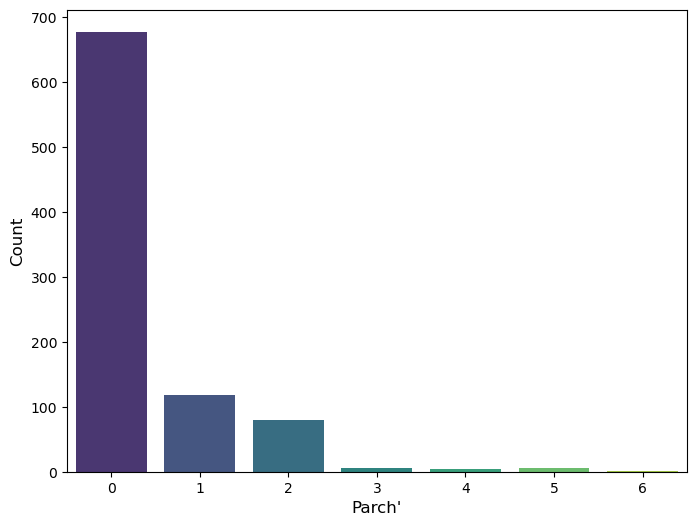

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train, x='Parch', palette='viridis')
plt.xlabel("Parch'", fontsize=12)  
plt.ylabel("Count", fontsize=12)
plt.show()

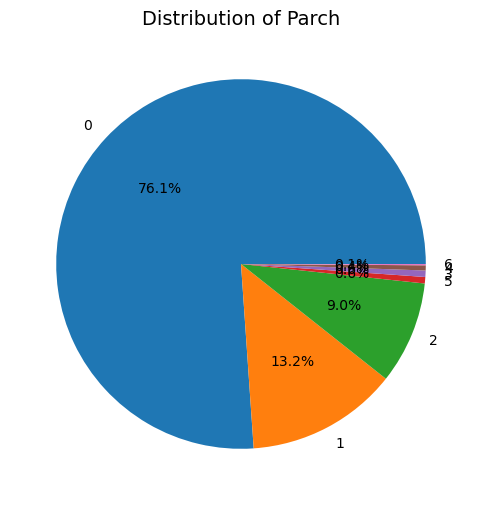

In [34]:
parch_counts = train['Parch'].value_counts()
plt.figure(figsize=(8, 6))
parch_counts.plot(kind='pie', autopct='%1.1f%%', labels=parch_counts.index)
plt.ylabel('')  
plt.title("Distribution of Parch", fontsize=14)
plt.show()

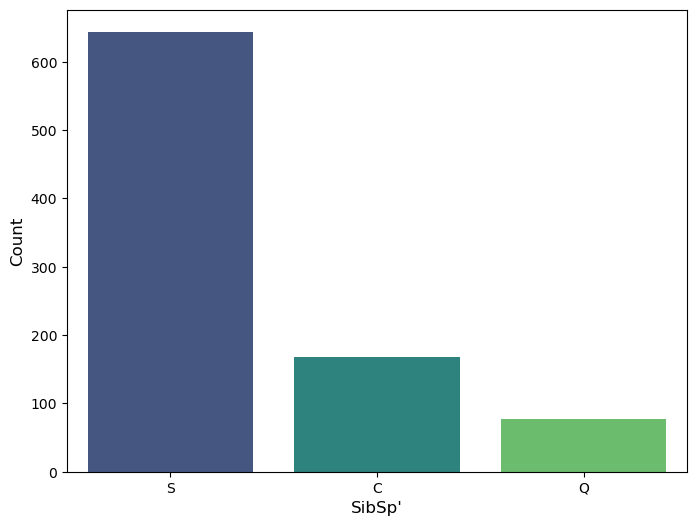

In [35]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train, x='Embarked', palette='viridis')
plt.xlabel("SibSp'", fontsize=12)  
plt.ylabel("Count", fontsize=12)
plt.show()

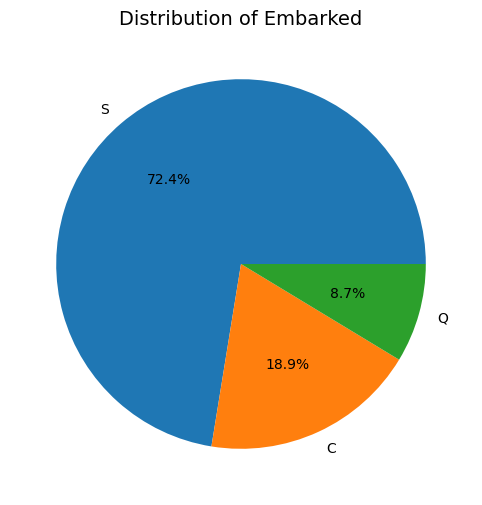

In [36]:
embarked_counts = train['Embarked'].value_counts()
plt.figure(figsize=(8, 6))
embarked_counts.plot(kind='pie', autopct='%1.1f%%',  labels=embarked_counts.index)
plt.ylabel('') 
plt.title("Distribution of Embarked", fontsize=14)
plt.show()

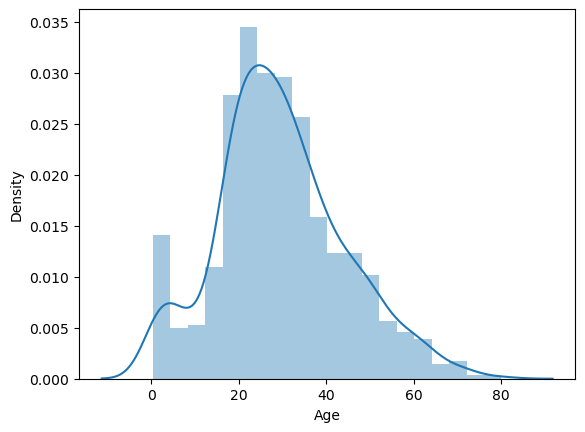

In [37]:
sns.distplot(train['Age'])
plt.show()

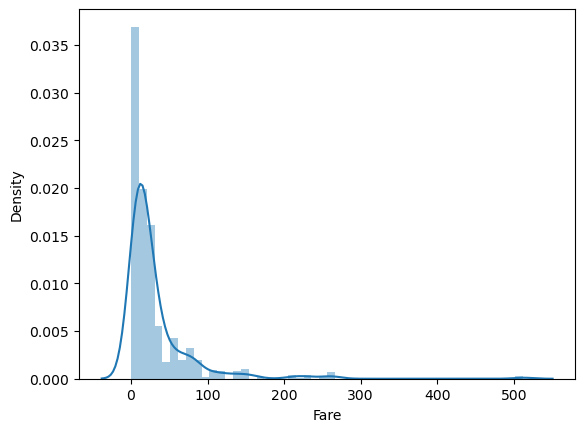

In [38]:
sns.distplot(train['Fare'])
plt.show()

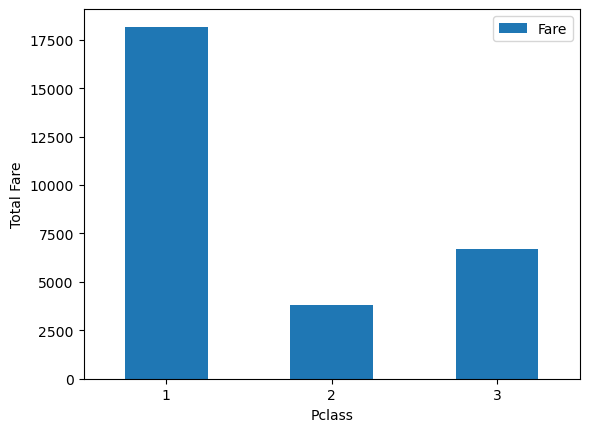

In [39]:
class_fare = train.pivot_table(index='Pclass', values='Fare', aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Total Fare')
plt.xticks(rotation=0)
plt.show()

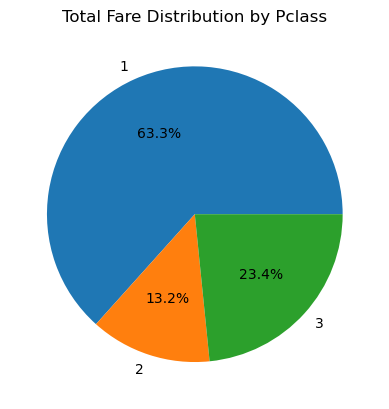

In [40]:
class_fare = train.pivot_table(index='Pclass', values='Fare', aggfunc=np.sum)
class_fare.plot(kind='pie', y='Fare', autopct='%1.1f%%', legend=False)
plt.ylabel('')
plt.title('Total Fare Distribution by Pclass')
plt.show()

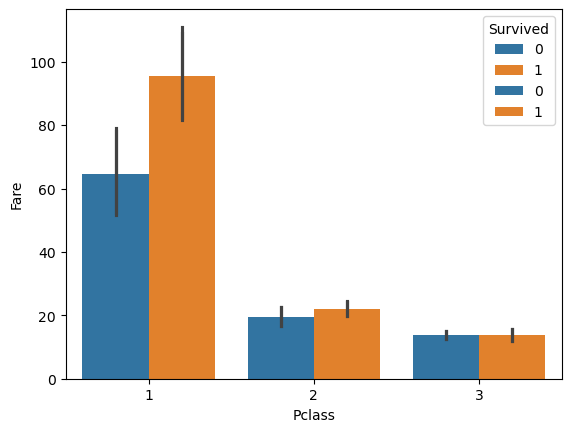

In [43]:
sns.barplot(data=train, x='Pclass', y='Fare', hue='Survived')
plt.show()


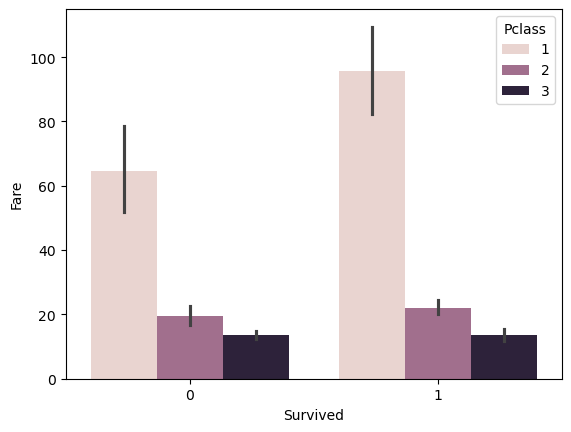

In [44]:
sns.barplot(data=train, x='Survived', y='Fare', hue='Pclass')
plt.show()

In [45]:
train_len = len(train)
# combine two dataframes
df = pd.concat([train, test], axis=0)
df = df.reset_index(drop=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [47]:
df = df.drop(columns=['Cabin'], axis=1)

In [48]:
df['Age'].mean()

29.881137667304014

In [49]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [50]:
df['Embarked'].mode()[0]

'S'

In [51]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

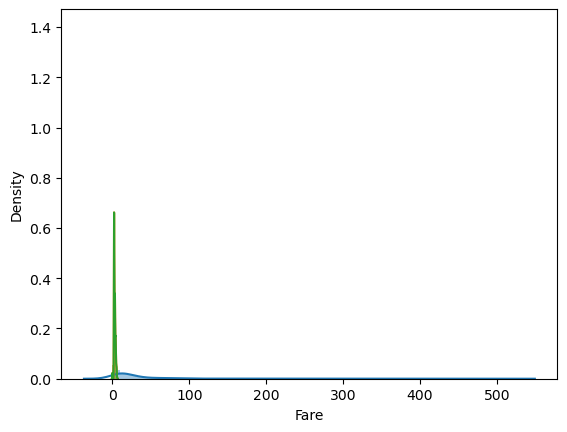

In [57]:
sns.distplot(df['Fare'])
plt.show()

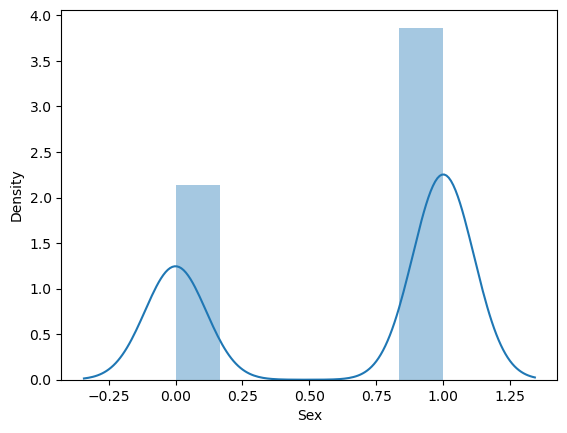

In [72]:
sns.distplot(df['Sex'])
plt.show()

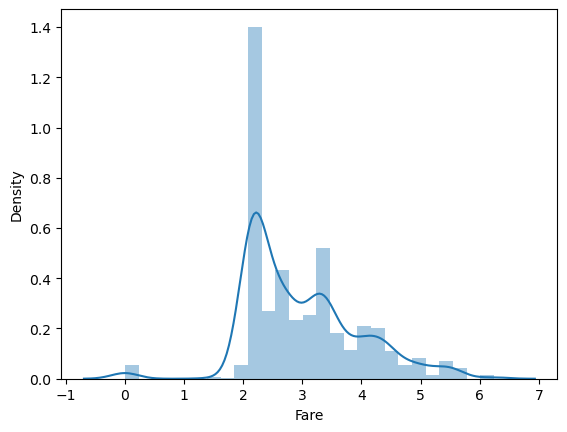

In [58]:
sns.distplot(df['Fare'])
plt.show()

In [55]:
df = df.drop(columns=['Name', 'Ticket'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,2.110213,S
1,2,1.0,1,female,38.0,1,0,4.280593,C
2,3,1.0,3,female,26.0,0,0,2.188856,S
3,4,1.0,1,female,35.0,1,0,3.990834,S
4,5,0.0,3,male,35.0,0,0,2.202765,S


In [56]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex', 'Embarked']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


In [62]:
test = df.iloc[train_len:, :]
test

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,NaN,3,1,34.500000,0,0,2.178064,1
892,893,NaN,3,0,47.000000,1,0,2.079442,2
893,894,NaN,2,1,62.000000,0,0,2.369075,1
894,895,NaN,3,1,27.000000,0,0,2.268252,2
895,896,NaN,3,0,22.000000,1,1,2.586824,2
...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,1,29.881138,0,0,2.202765,2
1305,1306,NaN,1,0,39.000000,0,0,4.699571,0
1306,1307,NaN,3,1,38.500000,0,0,2.110213,2
1307,1308,NaN,3,1,29.881138,0,0,2.202765,2


In [63]:
train = df.iloc[:train_len, :]
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.000000,1,0,2.110213,2
1,2,1.0,1,0,38.000000,1,0,4.280593,0
2,3,1.0,3,0,26.000000,0,0,2.188856,2
3,4,1.0,1,0,35.000000,1,0,3.990834,2
4,5,0.0,3,1,35.000000,0,0,2.202765,2
...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,1,27.000000,0,0,2.639057,2
887,888,1.0,1,0,19.000000,0,0,3.433987,2
888,889,0.0,3,0,29.881138,1,2,3.196630,2
889,890,1.0,1,1,26.000000,0,0,3.433987,0


In [60]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int32  
dtypes: float64(3), int32(2), int64(4)
memory usage: 55.8 KB


In [65]:
train.shape

(891, 9)

In [66]:
test.shape

(418, 9)

In [67]:
train



,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.000000,1,0,2.110213,2
1,2,1.0,1,0,38.000000,1,0,4.280593,0
2,3,1.0,3,0,26.000000,0,0,2.188856,2
3,4,1.0,1,0,35.000000,1,0,3.990834,2
4,5,0.0,3,1,35.000000,0,0,2.202765,2
...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,1,27.000000,0,0,2.639057,2
887,888,1.0,1,0,19.000000,0,0,3.433987,2
888,889,0.0,3,0,29.881138,1,2,3.196630,2
889,890,1.0,1,1,26.000000,0,0,3.433987,0


In [68]:
test

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,NaN,3,1,34.500000,0,0,2.178064,1
892,893,NaN,3,0,47.000000,1,0,2.079442,2
893,894,NaN,2,1,62.000000,0,0,2.369075,1
894,895,NaN,3,1,27.000000,0,0,2.268252,2
895,896,NaN,3,0,22.000000,1,1,2.586824,2
...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,1,29.881138,0,0,2.202765,2
1305,1306,NaN,1,0,39.000000,0,0,4.699571,0
1306,1307,NaN,3,1,38.500000,0,0,2.110213,2
1307,1308,NaN,3,1,29.881138,0,0,2.202765,2


In [73]:
a = df[df["Survived"] == 1]  
b = a[a["Pclass"] == 1] 
b["Age"].value_counts()

Age
29.881138    14
35.000000     9
36.000000     7
48.000000     5
24.000000     5
30.000000     5
38.000000     4
39.000000     4
49.000000     4
22.000000     4
17.000000     3
27.000000     3
52.000000     3
33.000000     3
42.000000     3
18.000000     3
16.000000     3
19.000000     3
58.000000     3
31.000000     3
40.000000     3
23.000000     3
45.000000     2
51.000000     2
56.000000     2
21.000000     2
28.000000     2
54.000000     2
50.000000     2
26.000000     2
44.000000     2
25.000000     2
60.000000     2
32.000000     2
14.000000     1
15.000000     1
62.000000     1
11.000000     1
43.000000     1
0.920000      1
29.000000     1
37.000000     1
63.000000     1
80.000000     1
4.000000      1
53.000000     1
41.000000     1
34.000000     1
47.000000     1
Name: count, dtype: int64

In [76]:
b["Age"].count()

136

In [78]:
a = df[df["Survived"] == 1]  
b = a[a["Pclass"] == 3] 
b["Age"].value_counts()
b["Sex"]

Age
29.881138    16
47.000000     4
45.000000     3
50.000000     3
54.000000     2
37.000000     2
36.000000     2
31.000000     2
19.000000     2
62.000000     2
56.000000     2
61.000000     2
58.000000     2
24.000000     2
29.000000     2
71.000000     2
46.000000     2
65.000000     2
64.000000     2
28.000000     2
40.000000     2
38.000000     2
25.000000     1
18.000000     1
49.000000     1
60.000000     1
70.000000     1
39.000000     1
55.000000     1
52.000000     1
30.000000     1
27.000000     1
22.000000     1
45.500000     1
2.000000      1
44.000000     1
51.000000     1
21.000000     1
42.000000     1
33.000000     1
Name: count, dtype: int64